<a href="https://colab.research.google.com/github/anandast/fga-binar-ds/blob/main/Customer%20Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (15, 10)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
from imblearn.over_sampling import SMOTE

# Read Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FGA-BINAR/Challenge 2/Data Train.csv')

In [ ]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

We can see that:
* The dataframe has a total of 4250 rows and 20 columns
* Dataframe does not have *null* values
* There are 5 columns with `categorical` features
* There are 15 columns with `numerical` features
* The modeling target is a `churn` column with data type `object`

In [ ]:
cats = ['state','area_code','international_plan','voice_mail_plan','churn']
nums = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls']

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


Some observations from the *statistical summary* numeric column above:
* The `number_vmail_messages`,`total_intl_calls`,`number_customer_service_calls` column appears to be asymmetric, because mean > median
* Apart from those columns, the distribution looks quite symmetrical (*mean* and *median* are quite close, and the Q2 value is roughly in the middle of Q1 - Q3)


In [ ]:
df[cats].describe().T

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


Some observations from the *statistical summary* category column above:
* The `state` column has many unique values; it may not be very useful as a predictor and will be removed
* The majority of data are customers without using international plan (Top column `international_plan` is `no` with frequency 3854)
* The `international_plan`, `voice_mail_plan`, `churn` column are binary with yes and no value

# Inferential Statistic

## Chi-square Test

In [ ]:
def chi_square_test(contingency_table):
    c, p, dof, expected = chi2_contingency(contingency_table)
    print("chi-square-statistic: {}".format(c))
    print("p-value : {}".format(p))
    print("expected-freq:")
    print(expected)
    print("degree-of-freedom: {}".format(dof))

### area_code

- $H_0$ : `area_code` and `churn` are independent
- $H_1$ : `area_code` and `churn` are dependent

In [ ]:
area_contigency= pd.crosstab(df['area_code'], df['churn'])
area_contigency

churn,no,yes
area_code,,
area_code_408,934,152
area_code_415,1821,287
area_code_510,897,159


In [ ]:
print(chi_square_test(area_contigency))

chi-square-statistic: 1.2166542631365147
p-value : 0.5442605842955197
expected-freq:
[[ 933.19341176  152.80658824]
 [1811.392       296.608     ]
 [ 907.41458824  148.58541176]]
degree-of-freedom: 2
None


#### Conclusion

- The p-value is 0.5442605842955197 which is more than the critical value of 0.05. This means that we do not reject the null hypothesis.

- We can conclude that there is not enough evidence that `area_code` and `churn` are dependent. So, `area_code` and `churn` are independent

### international_plan

- $H_0$ : `international_plan` and `churn` are independent
- $H_1$ : `international_plan` and `churn` are dependent

In [ ]:
ip_contigency = pd.crosstab(df['international_plan'],df['churn'])
ip_contigency

churn,no,yes
international_plan,,
no,3423,431
yes,229,167


In [ ]:
print(chi_square_test(ip_contigency))

chi-square-statistic: 282.65349013787664
p-value : 1.9831895448817517e-63
expected-freq:
[[3311.71952941  542.28047059]
 [ 340.28047059   55.71952941]]
degree-of-freedom: 1
None


#### Conclusion

- The p-value is 1.9831895448817517e-63 which is less than the critical value of 0.05. This means that we do reject the null hypothesis.

- We can conclude that there is enough evidence that `international_plan` and `churn` are dependent.

### voice_mail_plan

- $H_0$ : `voice_mail_plan` and `churn` are independent
- $H_1$ : `voice_mail_plan` and `churn` are dependent

In [ ]:
vmp_contigency = pd.crosstab(df['voice_mail_plan'],df['churn'])
vmp_contigency

churn,no,yes
voice_mail_plan,,
no,2622,516
yes,1030,82


In [ ]:
print(chi_square_test(vmp_contigency))

chi-square-statistic: 55.10981373962457
p-value : 1.139803854851859e-13
expected-freq:
[[2696.46494118  441.53505882]
 [ 955.53505882  156.46494118]]
degree-of-freedom: 1
None


#### Conclusion

- The p-value is 1.139803854851859e-13 which is less than the critical value of 0.05. This means that we do reject the null hypothesis.

- We can conclude that there is enough evidence that `voice_mail_plan` and `churn` are dependent.

## T-test

- $H_0 : \mu_1 = \mu_2$

- $H_1 : \mu_1 \not= \mu_2$


In [ ]:
churn_dict = {'yes':1 , 'no':0}
df['target_class'] = df['churn'].replace(churn_dict)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
def perform_t_test(df, nums, churn_col='target_class', alpha=0.05, equal_var=False):
    results = {}
    for num in nums:
        churn = df[df[churn_col] == 1][num]
        not_churn = df[df[churn_col] == 0][num]

        t_statistic, p_value = ttest_ind(churn, not_churn, equal_var=equal_var)

        significance = "significant" if p_value < alpha else "not significant"
        results[num] = {"t_statistic": t_statistic, "p_value": p_value, "significance": significance}
    return results

results = perform_t_test(df, nums)

for num, interpretation in results.items():
    print("T-test result for {}: t-statistic = {}, p-value = {}, The average difference between the churn and non-churn groups is {}.".format(num, interpretation["t_statistic"], interpretation["p_value"], interpretation["significance"]))


T-test result for account_length: t-statistic = 1.2720053076260385, p-value = 0.2037366349994794, The average difference between the churn and non-churn groups is not significant.
T-test result for number_vmail_messages: t-statistic = -7.629191163852065, p-value = 5.884325023424042e-14, The average difference between the churn and non-churn groups is significant.
T-test result for total_day_minutes: t-statistic = 11.351061964809938, p-value = 1.5719280728299807e-27, The average difference between the churn and non-churn groups is significant.
T-test result for total_day_calls: t-statistic = 0.7239036414528037, p-value = 0.46934243888738314, The average difference between the churn and non-churn groups is not significant.
T-test result for total_day_charge: t-statistic = 11.350416527152673, p-value = 1.5818150123801145e-27, The average difference between the churn and non-churn groups is significant.
T-test result for total_eve_minutes: t-statistic = 5.053029732701741, p-value = 5.40135

### Conclusion

- Based on the t test, it can be concluded that the average difference between the churn and non-churn groups is not significant in `account_length`, `total_day_calls`, `total_eve_calls`, `total_night_calls`.
- Apart from these columns, the average difference between the churn and non-churn groups is significant

## Univariate Analysis

### Barplot

In [ ]:
def plot_distribution(data, x_col, y_col, hue_col=None, title=''):
    plt.figure(figsize=(6, 5))
    c1 = sns.barplot(y=y_col, x=x_col, data=data, hue=hue_col, palette='pastel', legend=False)
    for container in c1.containers:
        c1.bar_label(container)
    plt.title(title)
    plt.show()

##### State

In [ ]:
state_dist = df.groupby(['state']).agg(count=('state','count')).reset_index()
state_dist.nlargest(3, 'count')

,state,count
49,WV,139
23,MN,108
13,ID,106


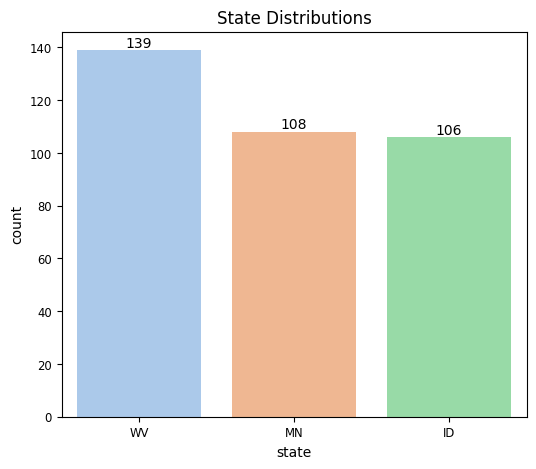

In [ ]:
plot_distribution(state_dist.nlargest(3, 'count'), 'state', 'count', hue_col='state', title='State Distributions')

##### Area Code

In [ ]:
area_dist = df.groupby(['area_code']).agg(count=('area_code','count')).reset_index()
area_dist

,area_code,count
0,area_code_408,1086
1,area_code_415,2108
2,area_code_510,1056


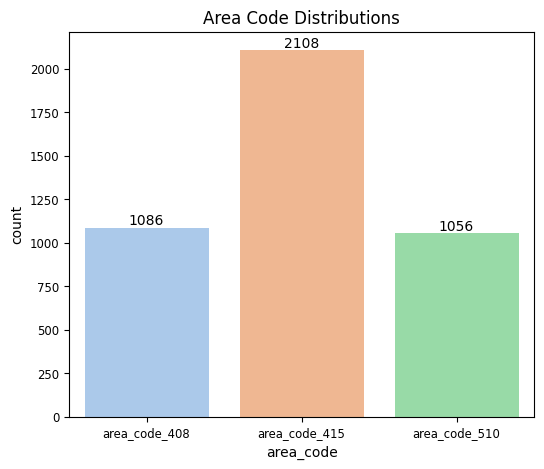

In [ ]:
plot_distribution(area_dist, 'area_code', 'count', hue_col='area_code', title='Area Code Distributions')

##### International Plan

In [ ]:
ip_dist = df.groupby(['international_plan']).agg(count=('international_plan','count')).reset_index()
ip_dist

,international_plan,count
0,no,3854
1,yes,396


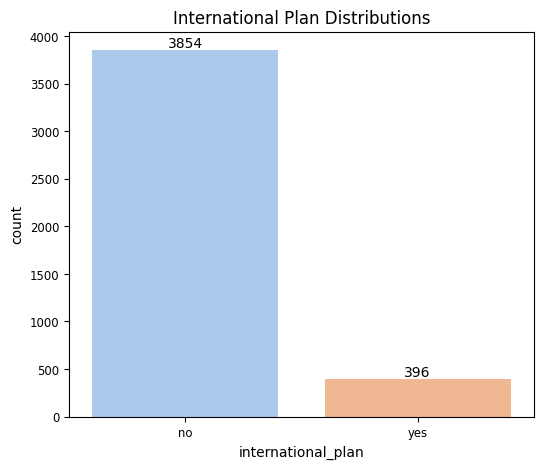

In [ ]:
plot_distribution(ip_dist, 'international_plan', 'count', hue_col='international_plan', title='International Plan Distributions')

#### Voice Mail Plan

In [ ]:
vmp_dist = df.groupby(['voice_mail_plan']).agg(count=('voice_mail_plan','count')).reset_index()
vmp_dist

,voice_mail_plan,count
0,no,3138
1,yes,1112


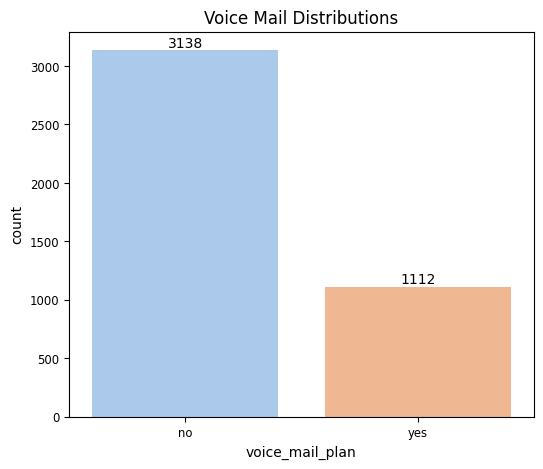

In [ ]:
plot_distribution(vmp_dist, 'voice_mail_plan', 'count', hue_col='voice_mail_plan', title='Voice Mail Distributions')

#### Churn

In [ ]:
churn_dist = df.groupby(['churn']).agg(count=('churn','count')).reset_index()
churn_dist

,churn,count
0,no,3652
1,yes,598


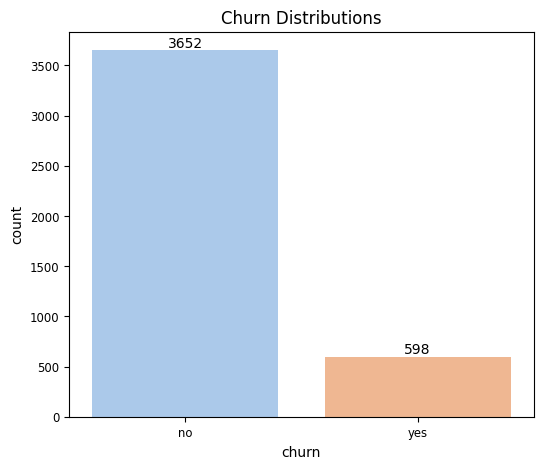

In [ ]:
plot_distribution(churn_dist, 'churn', 'count', hue_col='churn', title='Churn Distributions')

#### Number Customer Service Calls

In [ ]:
cs_calls_dist = df.groupby(['number_customer_service_calls']).agg(count=('number_customer_service_calls','count')).reset_index()
cs_calls_dist.nlargest(3,'count')

,number_customer_service_calls,count
1,1,1524
2,2,947
0,0,886


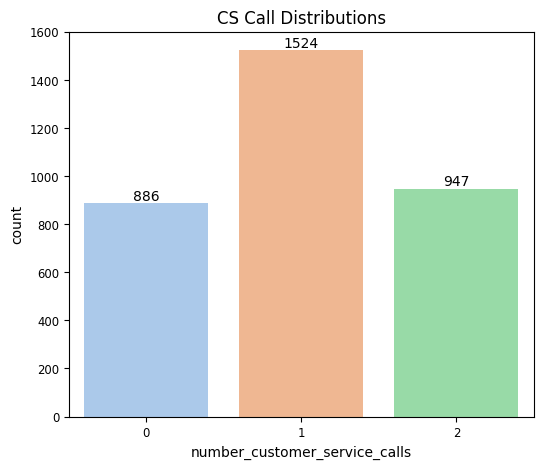

In [ ]:
plot_distribution(cs_calls_dist.nlargest(3, 'count'), 'number_customer_service_calls', 'count', hue_col='number_customer_service_calls', title='CS Call Distributions')

#### Number Voice Mail Messages

In [ ]:
vmail_msg_dist = df.groupby(['number_vmail_messages']).agg(count=('number_vmail_messages','count')).reset_index()
vmail_msg_dist.nlargest(3,'count')

,number_vmail_messages,count
0,0,3139
25,31,69
22,28,58


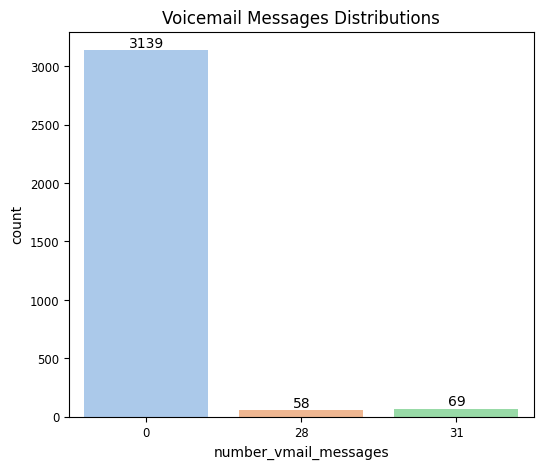

In [ ]:
plot_distribution(vmail_msg_dist.nlargest(3, 'count'), 'number_vmail_messages', 'count', hue_col='number_vmail_messages', title='Voicemail Messages Distributions')

#### Summary

Based on bar chart visualization:
* Most data comes from customers living in West Virginia, followed by Minnesota and Idaho
* The majority of data are customers with area code 415
* Most customers do not choose International packages and voicemail packages
* The target class is unbalanced because the churn is much smaller than No Churn, and we need to do something about this column later
* Most customers call customer service 1 time, followed by 2 times and no call
* Most customers never send voicemail messages

### Boxplot

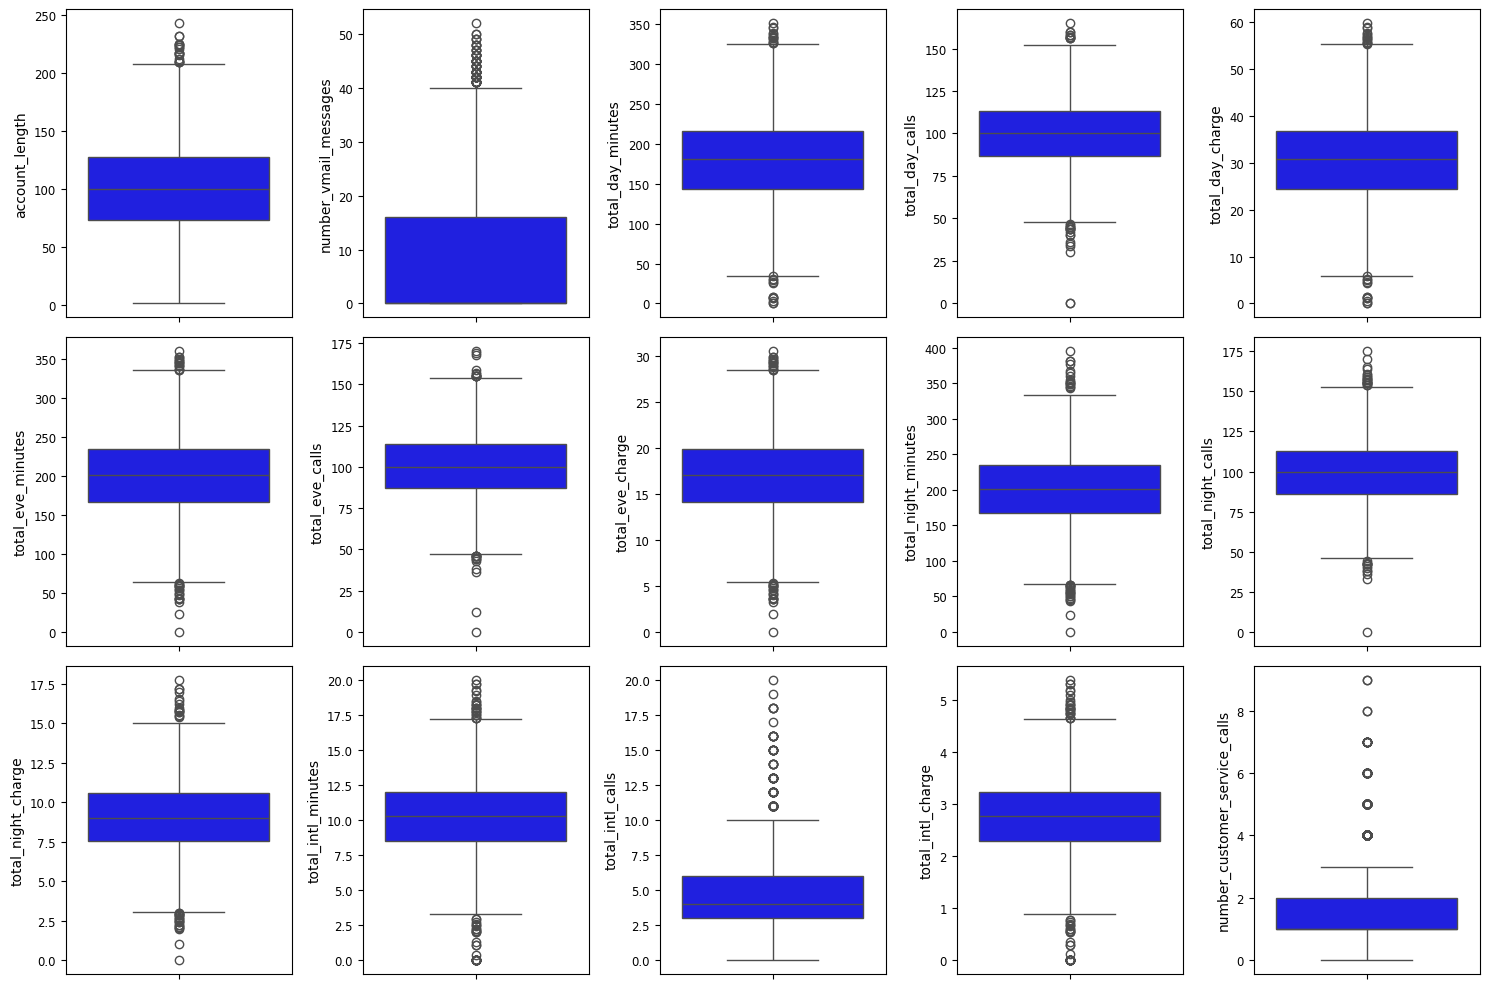

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)//3, i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

From the boxplot visualization we can see that there are outliers
* Outliers are visible in almost all columns
* From the boxplot it can be seen that the distribution looks a bit *skewed* (not symmetrical) as indicated by the location of the boxes far from the center of the Y axis: `number_vmail_message`, `total_intl_calls`, and `number_customer_service_calls`

### Dist plot

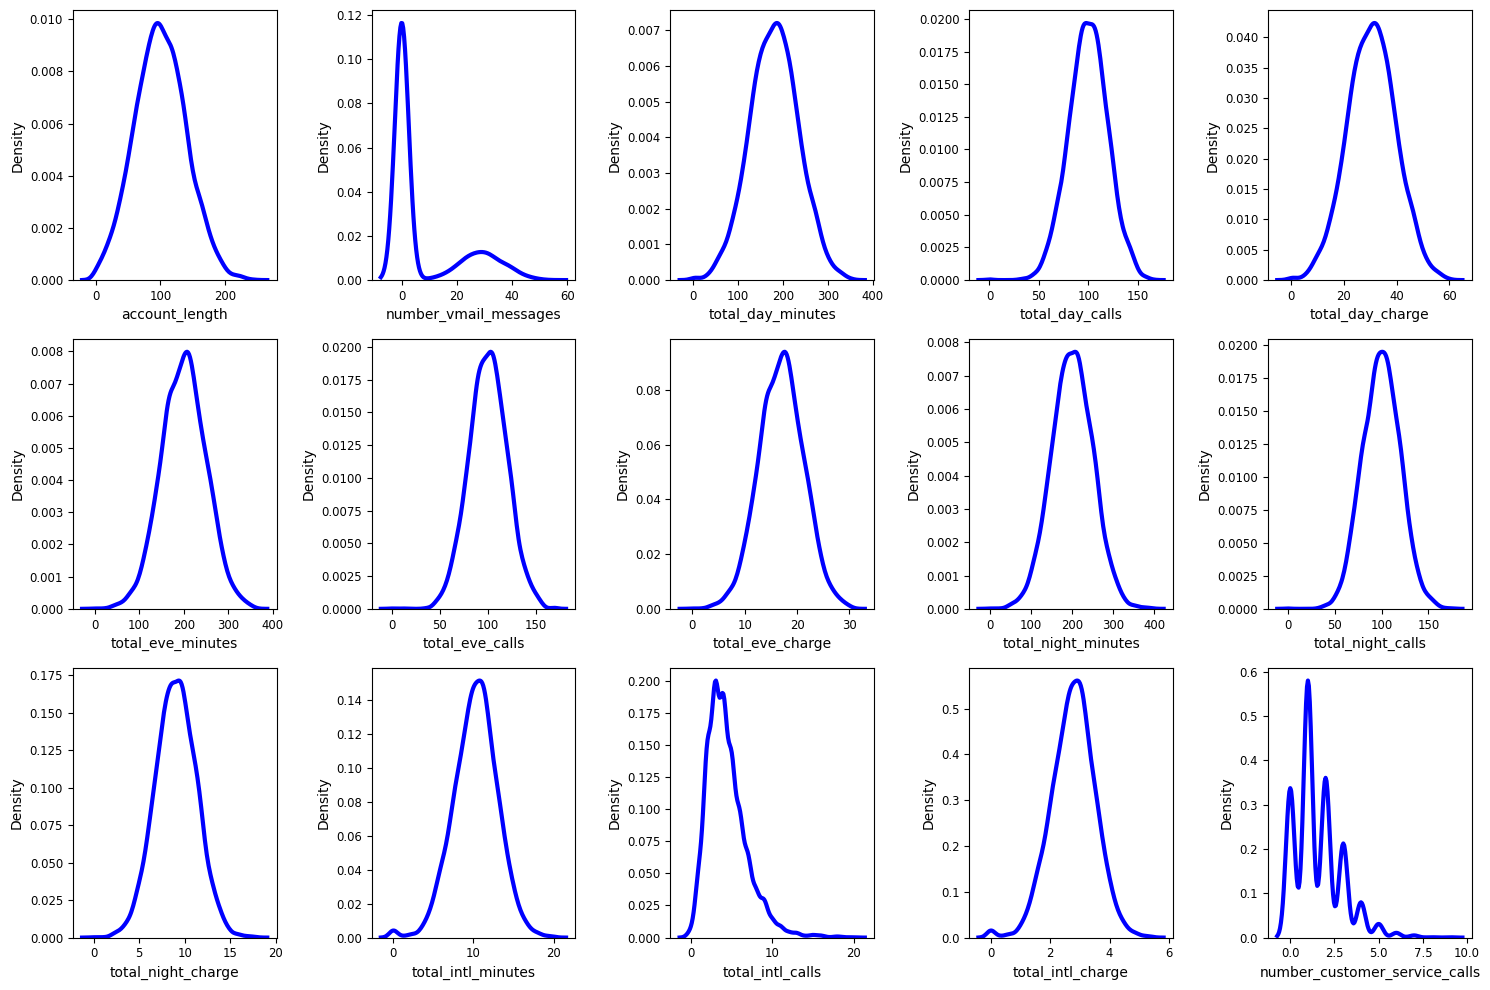

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)//3, i+1)
    sns.kdeplot(df[nums[i]], color='blue')
    plt.tight_layout()

Based on the distribution plot visualization:
* The `number_vmail_messages`, `total_intl_calls`, and `number_customers_service_calls` columns are slightly *skewed*.
* This means there is a possibility that we will need to do something to these columns later
* Apart from those columns, the distribution looks quite symmetrical

## Bivariate Analysis

### Barplot

In [ ]:
def plot_dist_bivariat(data, x_col, y_col, hue_col=None, title=''):
    plt.figure(figsize=(7, 5))
    c1 = sns.barplot(y=y_col, x=x_col, data=data, hue=hue_col, palette='pastel', legend=True)
    for container in c1.containers:
        c1.bar_label(container)
    plt.title(title)
    plt.legend(title=hue_col)
    plt.show()

##### Area Code - Churn

In [ ]:
area_churn_dist = df.groupby(['area_code','churn']).agg(count=('churn','count')).reset_index()
area_churn_dist

,area_code,churn,count
0,area_code_408,no,934
1,area_code_408,yes,152
2,area_code_415,no,1821
3,area_code_415,yes,287
4,area_code_510,no,897
5,area_code_510,yes,159


In [ ]:
total = area_churn_dist.groupby('area_code')['count'].sum()
area_churn_dist['percentage'] = area_churn_dist.apply(lambda row: round(row['count'] / total[row['area_code']] * 100), axis=1)
area_churn_dist

,area_code,churn,count,percentage
0,area_code_408,no,934,86
1,area_code_408,yes,152,14
2,area_code_415,no,1821,86
3,area_code_415,yes,287,14
4,area_code_510,no,897,85
5,area_code_510,yes,159,15


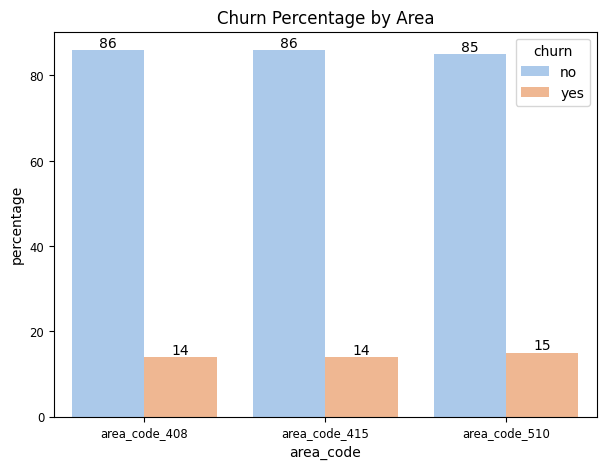

In [ ]:
plot_dist_bivariat(area_churn_dist, 'area_code', 'percentage', hue_col='churn', title='Churn Percentage by Area')

##### International Plan - Churn

In [ ]:
ip_churn_dist = df.groupby(['international_plan','churn']).agg(count=('churn','count')).reset_index()
ip_churn_dist

,international_plan,churn,count
0,no,no,3423
1,no,yes,431
2,yes,no,229
3,yes,yes,167


In [ ]:
total = ip_churn_dist.groupby('international_plan')['count'].sum()
ip_churn_dist['percentage'] = ip_churn_dist.apply(lambda row: round(row['count'] / total[row['international_plan']] * 100), axis=1)
ip_churn_dist

,international_plan,churn,count,percentage
0,no,no,3423,89
1,no,yes,431,11
2,yes,no,229,58
3,yes,yes,167,42


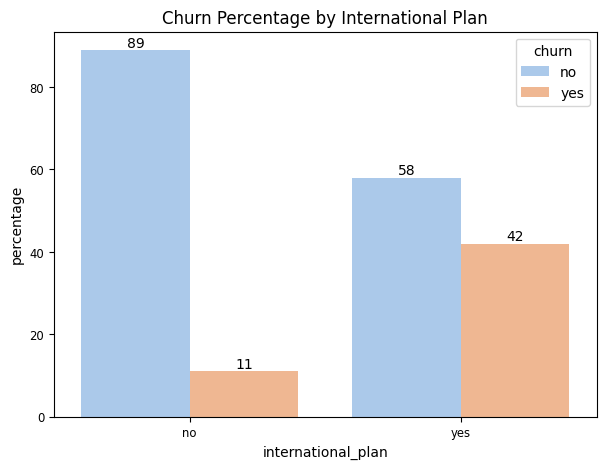

In [ ]:
plot_dist_bivariat(ip_churn_dist, 'international_plan', 'percentage', hue_col='churn', title='Churn Percentage by International Plan')

##### Voice Mail Plan - Churn

In [ ]:
vmp_churn_dist = df.groupby(['voice_mail_plan','churn']).agg(count=('churn','count')).reset_index()
vmp_churn_dist

,voice_mail_plan,churn,count
0,no,no,2622
1,no,yes,516
2,yes,no,1030
3,yes,yes,82


In [ ]:
total = vmp_churn_dist.groupby('voice_mail_plan')['count'].sum()
vmp_churn_dist['percentage'] = vmp_churn_dist.apply(lambda row: round(row['count'] / total[row['voice_mail_plan']] * 100), axis=1)
vmp_churn_dist

,voice_mail_plan,churn,count,percentage
0,no,no,2622,84
1,no,yes,516,16
2,yes,no,1030,93
3,yes,yes,82,7


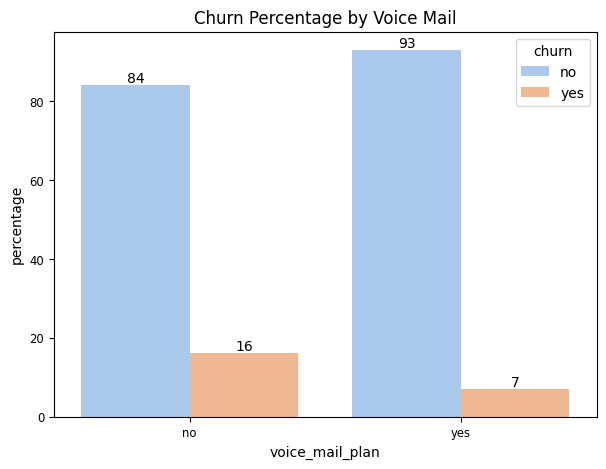

In [ ]:
plot_dist_bivariat(vmp_churn_dist, 'voice_mail_plan', 'percentage', hue_col='churn', title='Churn Percentage by Voice Mail')

#### Number CS Calls - Churn

In [ ]:
cs_calls_churn_dist = df.groupby(['number_customer_service_calls','churn']).agg(count=('number_customer_service_calls','count')).reset_index()
cs_calls_churn_dist

,number_customer_service_calls,churn,count
0,0,no,789
1,0,yes,97
2,1,no,1358
3,1,yes,166
4,2,no,845
5,2,yes,102
6,3,no,495
7,3,yes,63
8,4,no,117
9,4,yes,92


In [ ]:
total = cs_calls_churn_dist.groupby('number_customer_service_calls')['count'].sum()
cs_calls_churn_dist['percentage'] =  cs_calls_churn_dist.apply(lambda row: round(row['count'] / total[row['number_customer_service_calls']] * 100), axis=1)
cs_calls_churn_dist

,number_customer_service_calls,churn,count,percentage
0,0,no,789,89
1,0,yes,97,11
2,1,no,1358,89
3,1,yes,166,11
4,2,no,845,89
5,2,yes,102,11
6,3,no,495,89
7,3,yes,63,11
8,4,no,117,56
9,4,yes,92,44


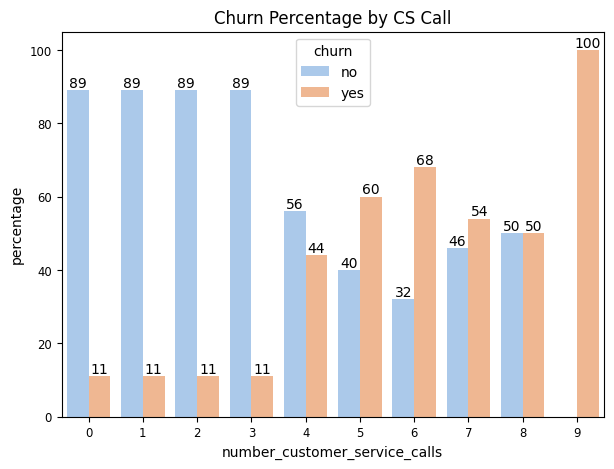

In [ ]:
plot_dist_bivariat(cs_calls_churn_dist, 'number_customer_service_calls', 'percentage', hue_col='churn', title='Churn Percentage by CS Call')

#### Total Days Minutes/Calls/Charge - Churn

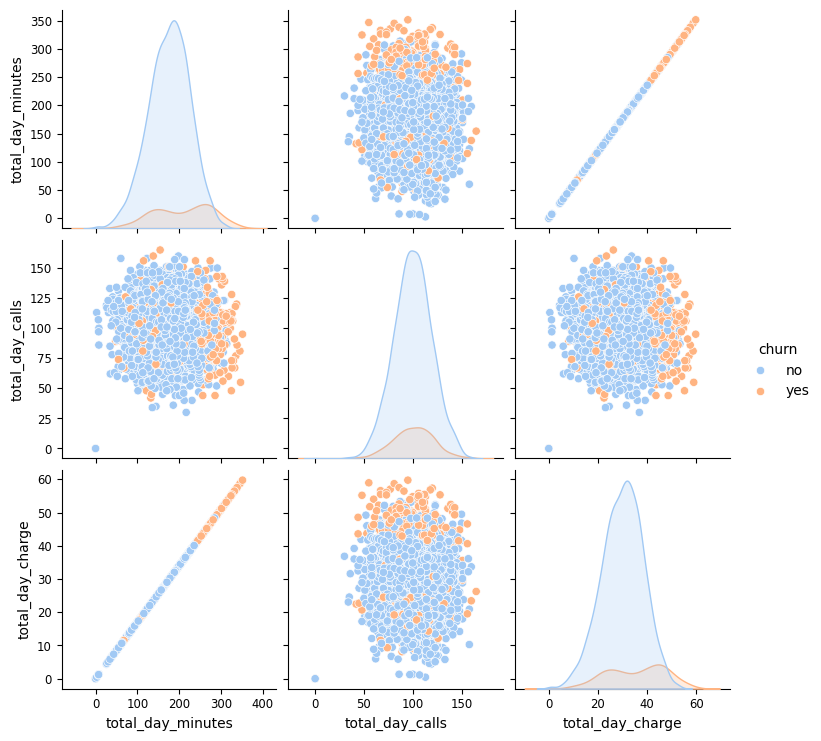

In [ ]:
sns.pairplot(df[['total_day_minutes', 'total_day_calls', 'total_day_charge', 'churn']], hue = 'churn', palette='pastel')

#### Total Eve Minutes/Calls/Charge - Churn

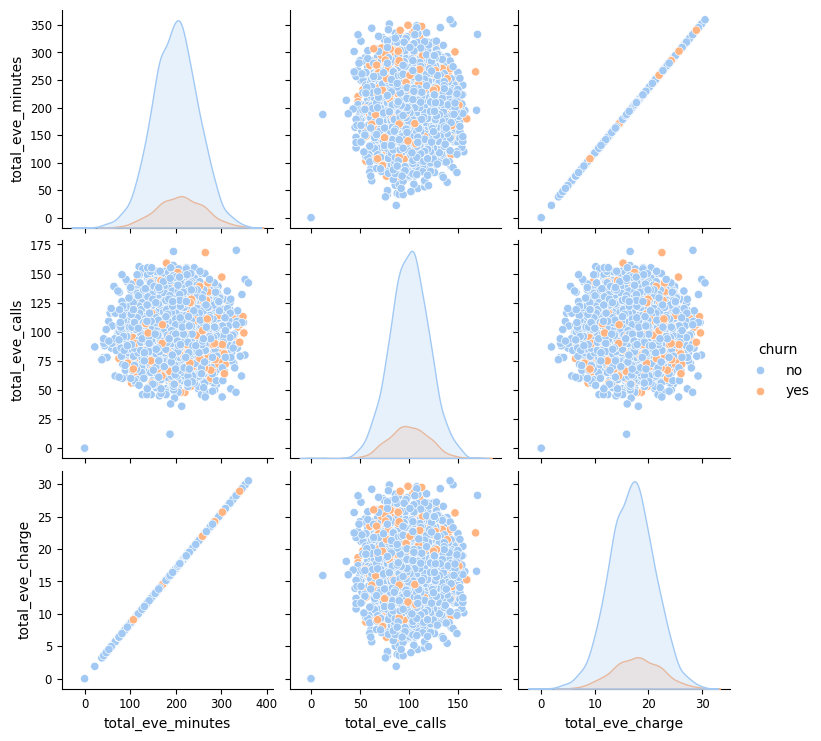

In [ ]:
sns.pairplot(df[['total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'churn']], hue = 'churn', palette='pastel')

#### Total Night Minutes/Calls/Charge - Churn

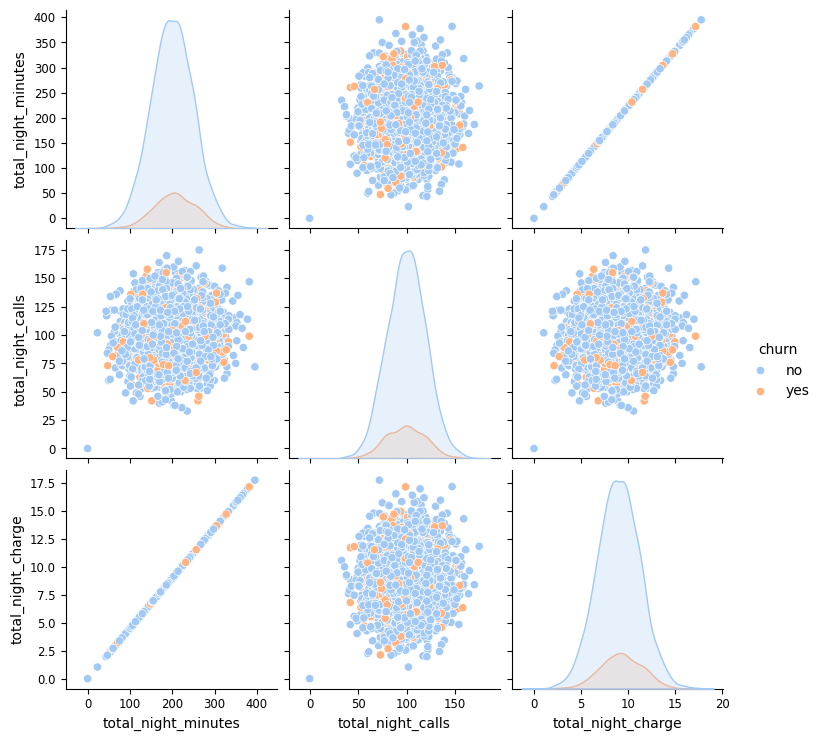

In [ ]:
sns.pairplot(df[['total_night_minutes', 'total_night_calls', 'total_night_charge', 'churn']], hue = 'churn', palette='pastel')

#### Total International Minutes/Calls/Charge - Churn

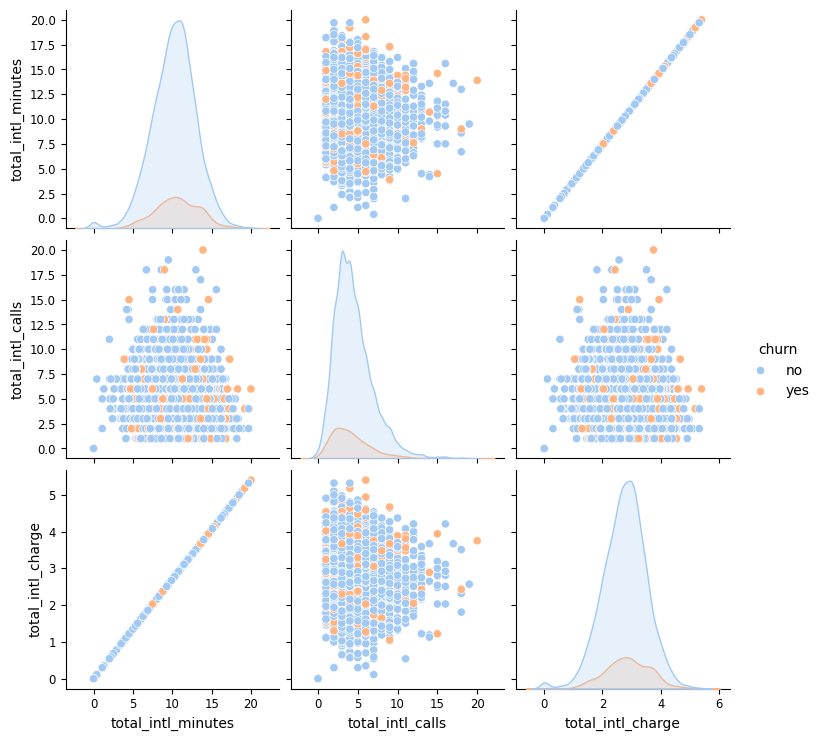

In [ ]:
sns.pairplot(df[['total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'churn']], hue = 'churn', palette='pastel')

#### Correlation Heatmap

<Axes: >

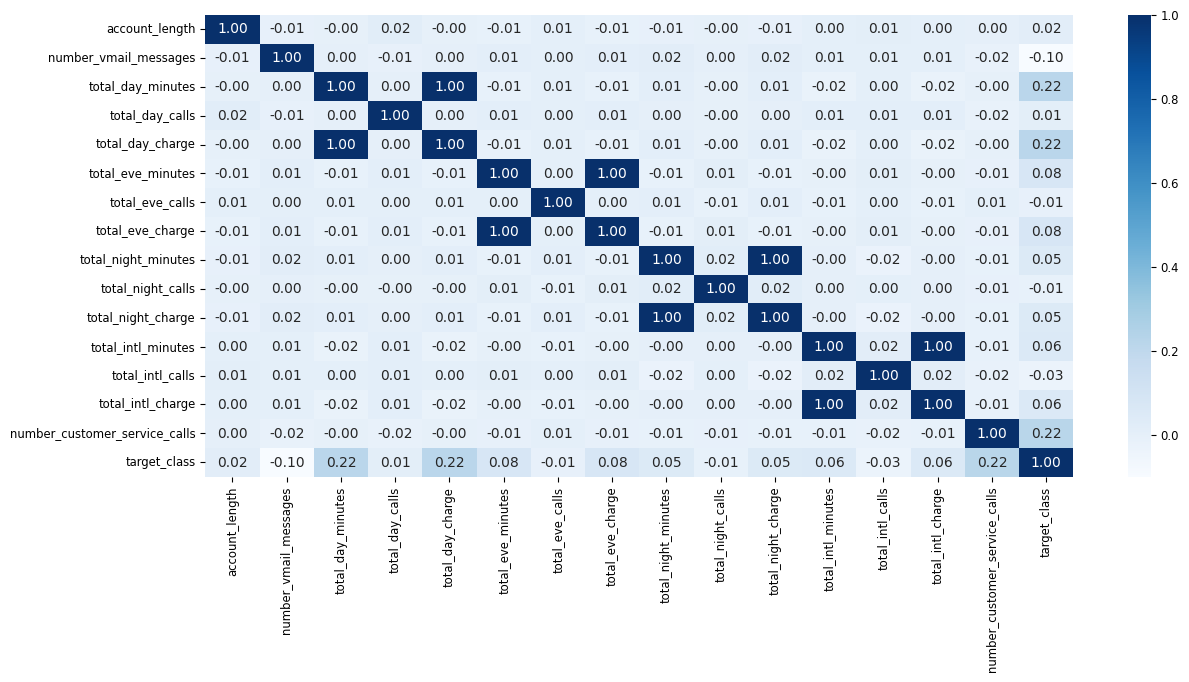

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True, fmt='.2f')

# Data Preprocessing

### Check duplicated data

In [ ]:
df.duplicated().sum()

0

## Drop unnecessary columns

In [ ]:
df.drop(['state','area_code','churn'],inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   object 
 2   voice_mail_plan                4250 non-null   object 
 3   number_vmail_messages          4250 non-null   int64  
 4   total_day_minutes              4250 non-null   float64
 5   total_day_calls                4250 non-null   int64  
 6   total_day_charge               4250 non-null   float64
 7   total_eve_minutes              4250 non-null   float64
 8   total_eve_calls                4250 non-null   int64  
 9   total_eve_charge               4250 non-null   float64
 10  total_night_minutes            4250 non-null   float64
 11  total_night_calls              4250 non-null   int64  
 12  total_night_charge             4250 non-null   f

## Handling Outlier

In [ ]:
def count_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

outliers_count = df[nums].apply(count_outliers_iqr)
pd.DataFrame(outliers_count).reset_index()

,index,0
0,account_length,20
1,number_vmail_messages,86
2,total_day_minutes,25
3,total_day_calls,28
4,total_day_charge,26
5,total_eve_minutes,34
6,total_eve_calls,24
7,total_eve_charge,34
8,total_night_minutes,37
9,total_night_calls,33


In [ ]:
def filter_outliers(df, nums):
    print(f"Number of rows before filtering outliers:", len(df))

    for col in nums:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1 - 1.5 * IQR
        high_limit = Q3 + 1.5 * IQR
        df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

    print(f"Number of rows after filtering outliers:", len(df))
    return df

df_filtered = filter_outliers(df, nums)

Number of rows before filtering outliers: 4250
Number of rows after filtering outliers: 3501


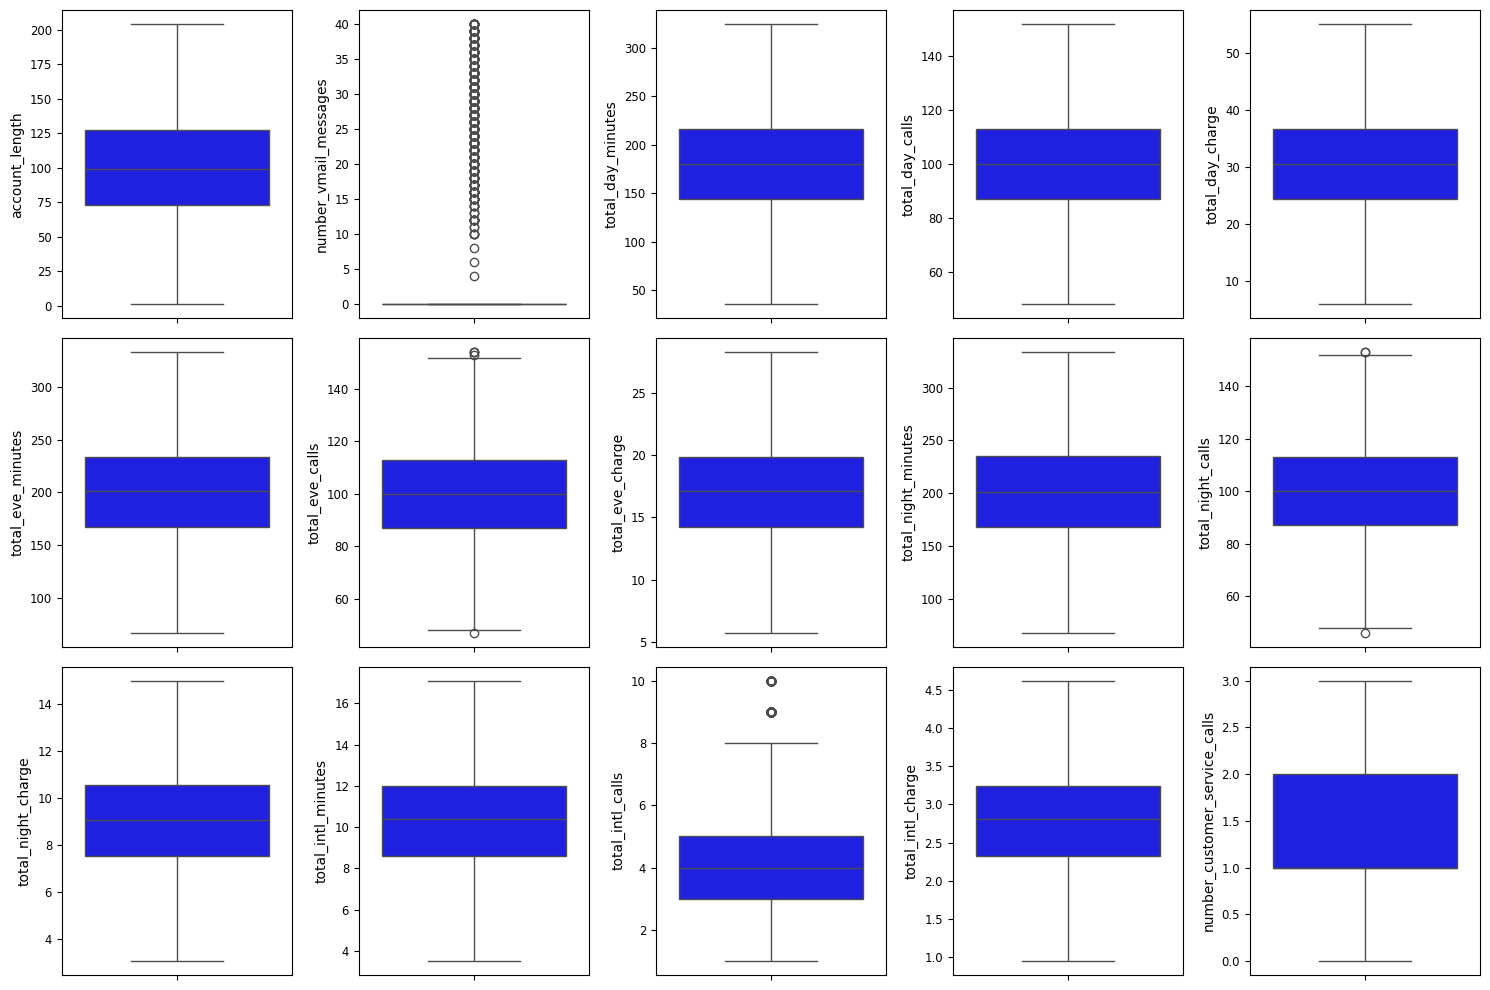

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)//3, i+1)
    sns.boxplot(y=df_filtered[nums[i]], color='blue', orient='v')
    plt.tight_layout()

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3501 entries, 0 to 4248
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 3501 non-null   int64  
 1   international_plan             3501 non-null   object 
 2   voice_mail_plan                3501 non-null   object 
 3   number_vmail_messages          3501 non-null   int64  
 4   total_day_minutes              3501 non-null   float64
 5   total_day_calls                3501 non-null   int64  
 6   total_day_charge               3501 non-null   float64
 7   total_eve_minutes              3501 non-null   float64
 8   total_eve_calls                3501 non-null   int64  
 9   total_eve_charge               3501 non-null   float64
 10  total_night_minutes            3501 non-null   float64
 11  total_night_calls              3501 non-null   int64  
 12  total_night_charge             3501 non-null   f

<Axes: >

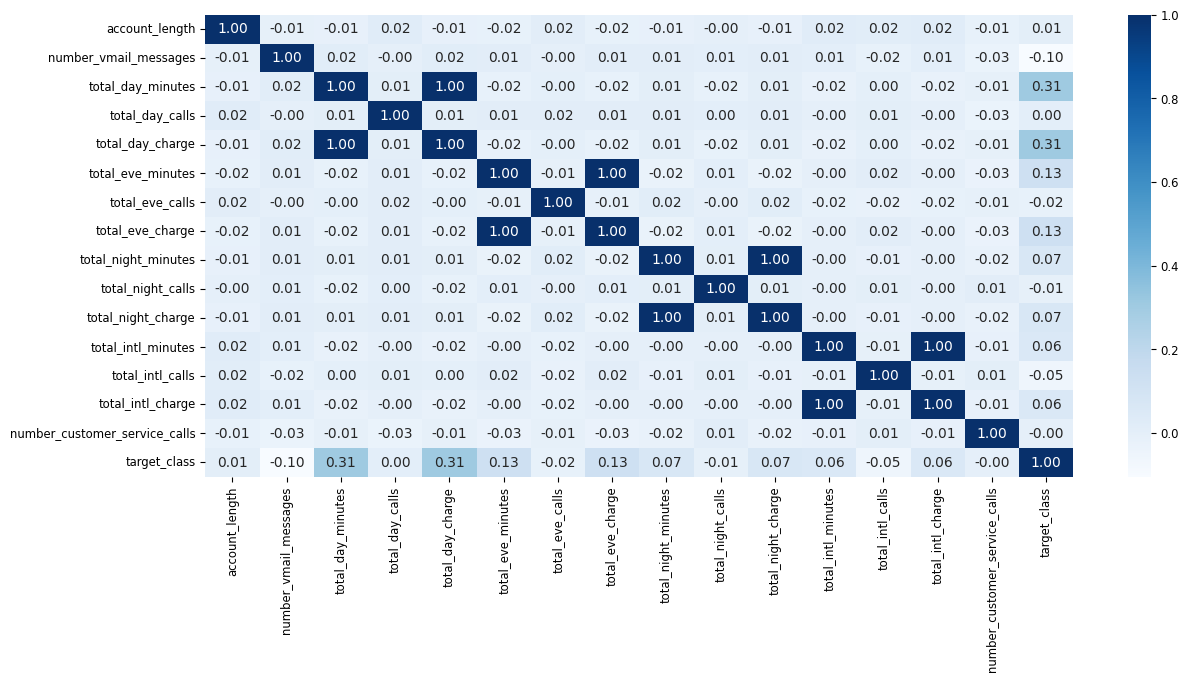

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_filtered.corr(numeric_only=True),cmap='Blues',annot=True, fmt='.2f')

## Label Encoding

In [ ]:
# cats_col = ['international_plan','voice_mail_plan']

In [ ]:
# le = LabelEncoder()
# for i in cats_col:
#   df_filtered[i]=le.fit_transform(df_filtered[i])
#   print(i)
#   print(list(le.classes_))
#   print(le.transform(list(le.classes_)))
#   print()

## One Hot Encoding

In [ ]:
df_filtered = pd.get_dummies(df_filtered)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3501 entries, 0 to 4248
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 3501 non-null   int64  
 1   number_vmail_messages          3501 non-null   int64  
 2   total_day_minutes              3501 non-null   float64
 3   total_day_calls                3501 non-null   int64  
 4   total_day_charge               3501 non-null   float64
 5   total_eve_minutes              3501 non-null   float64
 6   total_eve_calls                3501 non-null   int64  
 7   total_eve_charge               3501 non-null   float64
 8   total_night_minutes            3501 non-null   float64
 9   total_night_calls              3501 non-null   int64  
 10  total_night_charge             3501 non-null   float64
 11  total_intl_minutes             3501 non-null   float64
 12  total_intl_calls               3501 non-null   i

## Correlation Heatmap

<Axes: >

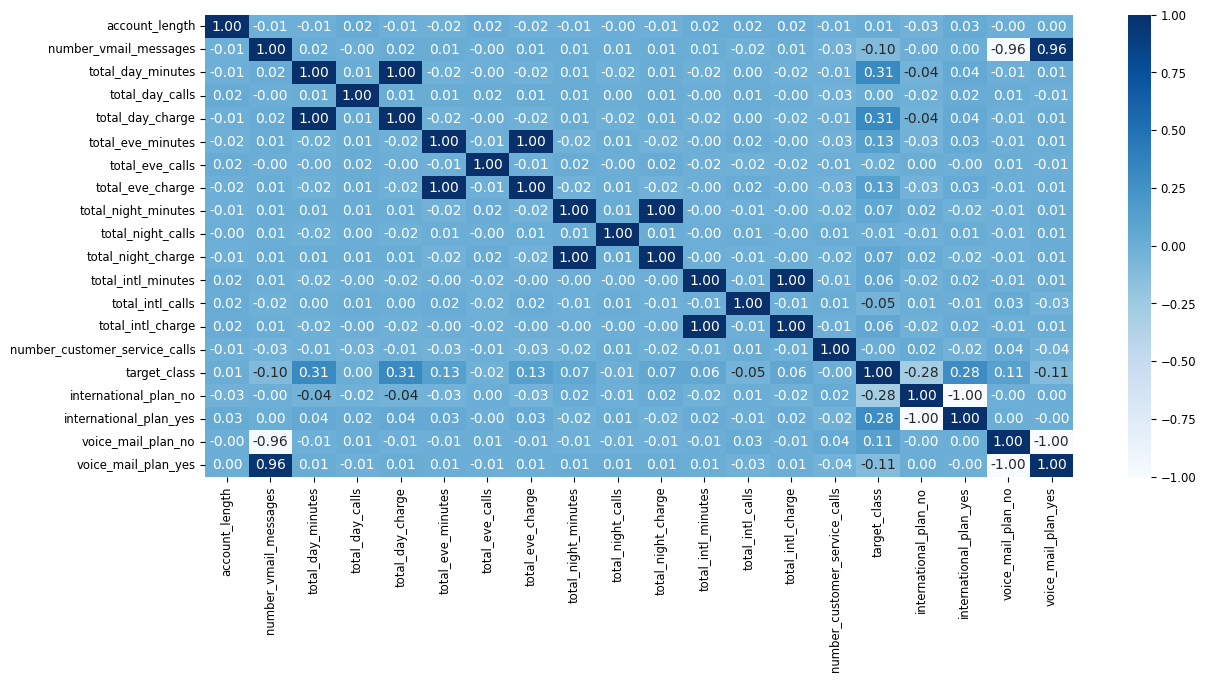

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_filtered.corr(numeric_only=True),cmap='Blues',annot=True, fmt='.2f')

In [ ]:
df_filtered.corr().abs()['target_class'].sort_values(ascending=False)

target_class                     1.000000
total_day_minutes                0.305862
total_day_charge                 0.305853
international_plan_no            0.281737
international_plan_yes           0.281737
total_eve_minutes                0.125022
total_eve_charge                 0.125005
voice_mail_plan_yes              0.114354
voice_mail_plan_no               0.114354
number_vmail_messages            0.104685
total_night_minutes              0.069528
total_night_charge               0.069493
total_intl_minutes               0.057343
total_intl_charge                0.057341
total_intl_calls                 0.051535
total_eve_calls                  0.016400
account_length                   0.010757
total_night_calls                0.006151
total_day_calls                  0.004894
number_customer_service_calls    0.002046
Name: target_class, dtype: float64

## Feature Selection

* Based on correlation heatmap, the features that have
low positive correlation with high value with target class are
`total_day_minutes` and `total_day_charge`.
`international_plan`, `total_eve_minutes` and `total_eve_charge` have low positive correlation value but the correlation value is still greater than the other features (corr >= 0.12).


In [ ]:
# df_final = df_filtered[['total_day_minutes','total_day_charge','international_plan','total_eve_minutes','total_eve_charge','target_class']]
# df_final.head()

df_final = df_filtered[['total_day_minutes','total_day_charge','international_plan_yes','international_plan_no','total_eve_minutes','total_eve_charge','target_class']]
df_final.head()

,total_day_minutes,total_day_charge,international_plan_yes,international_plan_no,total_eve_minutes,total_eve_charge,target_class
0,161.6,27.47,0,1,195.5,16.62,0
1,243.4,41.38,0,1,121.2,10.30,0
3,166.7,28.34,1,0,148.3,12.61,0
5,157.0,26.69,1,0,103.1,8.76,0
7,258.6,43.96,1,0,222.0,18.87,0


## SMOTE

In [ ]:
X = df_final.drop('target_class', axis=1)
y = df_final['target_class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['target_class'])], axis=1)

# Menampilkan hasil
print("Before SMOTE:")
print(y.value_counts())
print("\nAfter SMOTE:")
print(df_resampled['target_class'].value_counts())

Before SMOTE:
0    3136
1     365
Name: target_class, dtype: int64

After SMOTE:
0    3136
1    3136
Name: target_class, dtype: int64


In [ ]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_day_minutes       6272 non-null   float64
 1   total_day_charge        6272 non-null   float64
 2   international_plan_yes  6272 non-null   uint8  
 3   international_plan_no   6272 non-null   uint8  
 4   total_eve_minutes       6272 non-null   float64
 5   total_eve_charge        6272 non-null   float64
 6   target_class            6272 non-null   int64  
dtypes: float64(4), int64(1), uint8(2)
memory usage: 257.4 KB


# Modelling

## Normalization

In [ ]:
X = df_resampled.drop('target_class', axis=1)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
df_normalized['target_class'] = df_resampled['target_class']
df_normalized.head()

,total_day_minutes,total_day_charge,international_plan_yes,international_plan_no,total_eve_minutes,total_eve_charge,target_class
0,0.437414,0.437347,0.0,1.0,0.483384,0.483341,0
1,0.720263,0.720301,0.0,1.0,0.202795,0.202577,0
2,0.455048,0.455045,1.0,0.0,0.305136,0.305198,0
3,0.421508,0.421481,1.0,0.0,0.134441,0.134163,0
4,0.772822,0.772783,1.0,0.0,0.583459,0.583296,0


In [ ]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_day_minutes       6272 non-null   float64
 1   total_day_charge        6272 non-null   float64
 2   international_plan_yes  6272 non-null   float64
 3   international_plan_no   6272 non-null   float64
 4   total_eve_minutes       6272 non-null   float64
 5   total_eve_charge        6272 non-null   float64
 6   target_class            6272 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 343.1 KB


## Split Data

In [ ]:
X = df_normalized.drop('target_class', axis=1)
y = df_normalized['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set :", X_train.shape)
print("Test set:", X_test.shape)

Train set : (5017, 6)
Test set: (1255, 6)


## Decision Tree Classifier

In [ ]:
# Initialize DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Make predictions
y_proba = dt.predict_proba(X_test)[:,1]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC: %.2f%%" %(roc_auc*100))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9075697211155378
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       645
           1       0.91      0.90      0.90       610

    accuracy                           0.91      1255
   macro avg       0.91      0.91      0.91      1255
weighted avg       0.91      0.91      0.91      1255

ROC AUC: 90.75%
Confusion Matrix:
[[588  57]
 [ 59 551]]


## Random Forest

In [ ]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Make predictions
y_proba = rf.predict_proba(X_test)[:,1]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC: %.2f%%" %(roc_auc*100))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9266932270916335
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       645
           1       0.93      0.92      0.92       610

    accuracy                           0.93      1255
   macro avg       0.93      0.93      0.93      1255
weighted avg       0.93      0.93      0.93      1255

ROC AUC: 96.79%
Confusion Matrix:
[[601  44]
 [ 48 562]]


## XGBoost

In [ ]:
# Initialize XGBClassifier
xgb = XGBClassifier()

# Train the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Make predictions
y_proba = xgb.predict_proba(X_test)[:,1]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC: %.2f%%" %(roc_auc*100))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9155378486055777
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       645
           1       0.92      0.90      0.91       610

    accuracy                           0.92      1255
   macro avg       0.92      0.92      0.92      1255
weighted avg       0.92      0.92      0.92      1255

ROC AUC: 96.26%
Confusion Matrix:
[[600  45]
 [ 61 549]]


## Naive Bayes

In [ ]:
# Initialize Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Make predictions
y_proba = nb.predict_proba(X_test)[:,1]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC: %.2f%%" %(roc_auc*100))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8892430278884462
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       645
           1       0.88      0.90      0.89       610

    accuracy                           0.89      1255
   macro avg       0.89      0.89      0.89      1255
weighted avg       0.89      0.89      0.89      1255

ROC AUC: 89.81%
Confusion Matrix:
[[567  78]
 [ 61 549]]


## Logistic Regression

In [ ]:
# Initialize Gaussian Naive Bayes classifier
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Make predictions
y_proba = lr.predict_proba(X_test)[:,1]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC: %.2f%%" %(roc_auc*100))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8709163346613545
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       645
           1       0.87      0.86      0.87       610

    accuracy                           0.87      1255
   macro avg       0.87      0.87      0.87      1255
weighted avg       0.87      0.87      0.87      1255

ROC AUC: 91.74%
Confusion Matrix:
[[567  78]
 [ 84 526]]


## ROC AUC Curve

In [ ]:
def plot_roc_curve(model, X_test, y_true):
    y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_true, y_proba)

    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

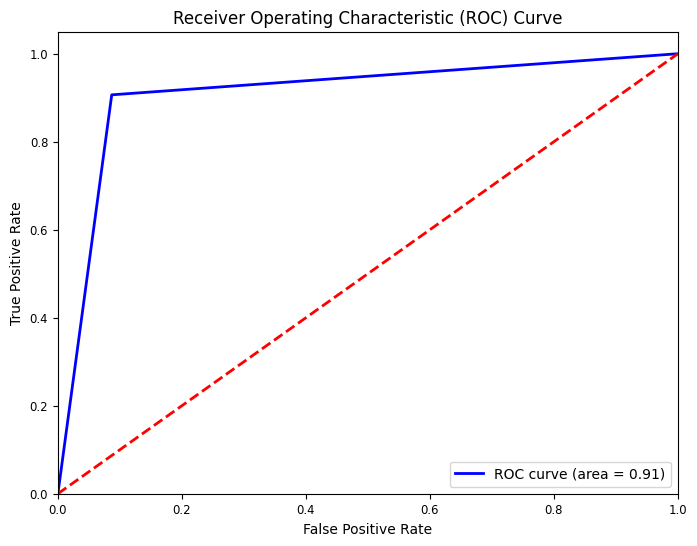

In [ ]:
plot_roc_curve(dt, X_test, y_test)

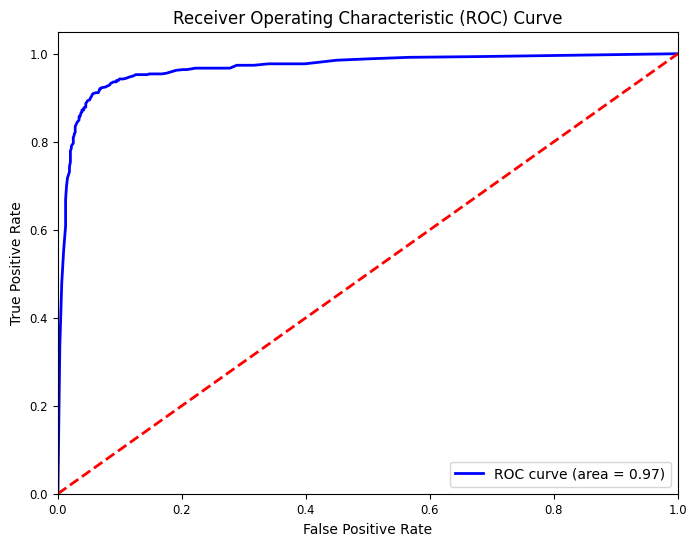

In [ ]:
plot_roc_curve(rf, X_test, y_test)

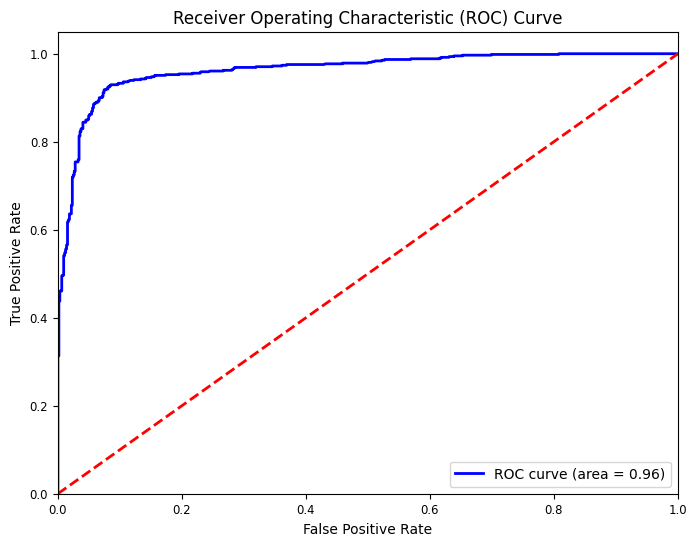

In [ ]:
plot_roc_curve(xgb, X_test, y_test)

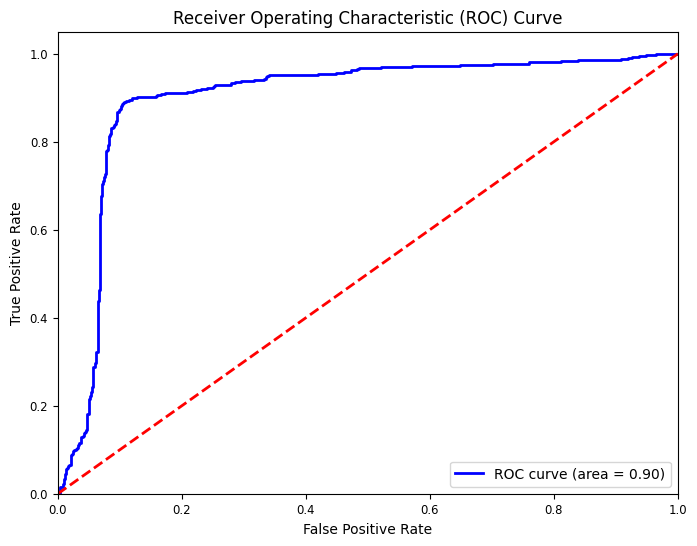

In [ ]:
plot_roc_curve(nb, X_test, y_test)

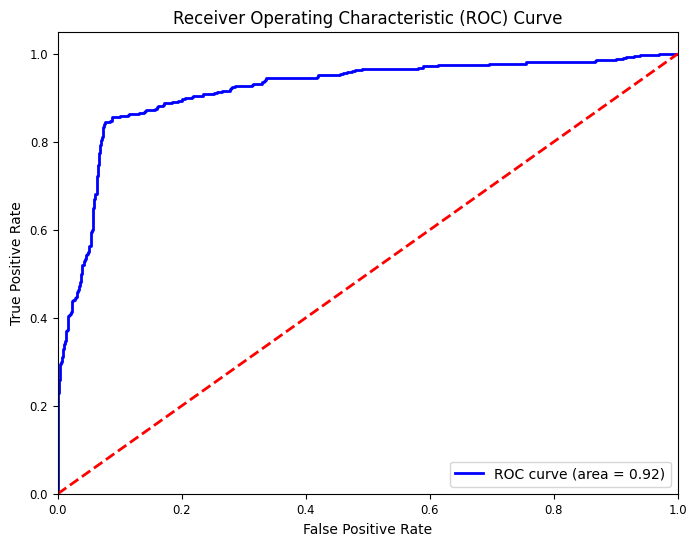

In [ ]:
plot_roc_curve(lr, X_test, y_test)

## Best Model

* The best model is Random Forest with 85% accuracy. This model will be used to test the data

# Testing

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/FGA-BINAR/Challenge 2/Data Test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
test_df = test_df[['total_day_minutes','total_day_charge','international_plan','total_eve_minutes','total_eve_charge']]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_day_minutes   750 non-null    float64
 1   total_day_charge    750 non-null    float64
 2   international_plan  750 non-null    object 
 3   total_eve_minutes   750 non-null    float64
 4   total_eve_charge    750 non-null    float64
dtypes: float64(4), object(1)
memory usage: 29.4+ KB


In [ ]:
# One hot encoding
test_df = pd.get_dummies(test_df)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_day_minutes       750 non-null    float64
 1   total_day_charge        750 non-null    float64
 2   total_eve_minutes       750 non-null    float64
 3   total_eve_charge        750 non-null    float64
 4   international_plan_no   750 non-null    uint8  
 5   international_plan_yes  750 non-null    uint8  
dtypes: float64(4), uint8(2)
memory usage: 25.0 KB


In [ ]:
test_df.sample(5)

,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,international_plan_no,international_plan_yes
6,212.0,36.04,31.2,2.65,1,0
5,84.8,14.42,136.7,11.62,1,0
8,140.4,23.87,271.8,23.10,1,0
406,224.9,38.23,250.0,21.25,1,0
361,239.9,40.78,261.6,22.24,1,0


In [ ]:
# le = LabelEncoder()
# for col in test_df.columns:
#     if test_df[col].dtype == 'O':
#         test_df[col] = le.fit_transform(test_df[col])

In [ ]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(test_df)

test_df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
test_df_normalized.head()

,total_day_minutes,total_day_charge,international_plan_yes,international_plan_no,total_eve_minutes,total_eve_charge
0,0.746675,0.746653,0.499850,0.500000,1.0,0.0
1,0.623411,0.623370,0.569624,0.569710,0.0,1.0
2,0.319834,0.319770,0.830075,0.830149,1.0,0.0
3,0.526751,0.526691,0.562406,0.562633,1.0,0.0
4,0.330476,0.330377,0.739549,0.739561,1.0,0.0


In [ ]:
prediction = rf.predict(test_df_normalized)
test_df_normalized['predict_class'] = prediction
# test_df_normalized.drop(['churn','predict_class'], inplace=True,axis=1)
# # prediction = nb.predict(test_df_normalized)
# # test_df_normalized['predict_class'] = prediction

In [ ]:
test_df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_day_minutes       750 non-null    float64
 1   total_day_charge        750 non-null    float64
 2   international_plan_yes  750 non-null    float64
 3   international_plan_no   750 non-null    float64
 4   total_eve_minutes       750 non-null    float64
 5   total_eve_charge        750 non-null    float64
 6   predict_class           750 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 41.1 KB


In [ ]:
test_df_normalized.head()

,total_day_minutes,total_day_charge,international_plan_yes,international_plan_no,total_eve_minutes,total_eve_charge,predict_class
0,0.746675,0.746653,0.499850,0.500000,1.0,0.0,1
1,0.623411,0.623370,0.569624,0.569710,0.0,1.0,0
2,0.319834,0.319770,0.830075,0.830149,1.0,0.0,0
3,0.526751,0.526691,0.562406,0.562633,1.0,0.0,0
4,0.330476,0.330377,0.739549,0.739561,1.0,0.0,0


In [ ]:
churn_dict = {1:'yes', 0:'no'}
test_df_normalized['churn']= test_df_normalized['predict_class'].replace(churn_dict)

In [ ]:
churn_predict_dist = test_df_normalized.groupby(['churn']).agg(count=('churn','count')).reset_index()
churn_predict_dist

,churn,count
0,no,393
1,yes,357


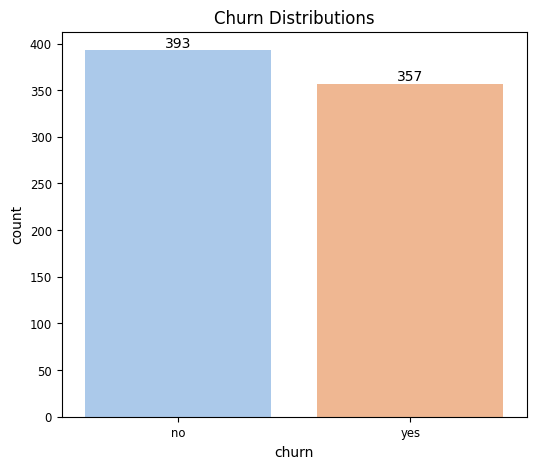

In [ ]:
plot_distribution(churn_predict_dist, 'churn', 'count', hue_col='churn', title='Churn Distributions')